In [37]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def gen_sample_grid(npt=200, x_limit = 4, y_limit = 4):
  x1line = np.linspace(0, x_limit, npt)
  x2line = np.linspace(0, y_limit, npt)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npt*npt]).T
  return Xgrid, x1line, x2line

df = pandas.read_csv('http://pogo.software/me4ml/slip_data.csv')

f1 = np.array(df['f1'][:])
f1ang = np.array(df['f1ang'][:])
f2 = np.array(df['f2'][:])
f2ang = np.array(df['f2ang'][:])
m = np.array(df['m'][:])
slips = np.array(df['slips'][:])

## combine these parameters into a single variable
X = np.column_stack((f1,f1ang,f2, f2ang))
Yt = np.array(df['slips'][:]) # classes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 0.7390 - accuracy: 0.4680
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5950
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6520
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7320
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.7990
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.8440
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.8440
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.8440
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.8440
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.8440
Epoch 11/

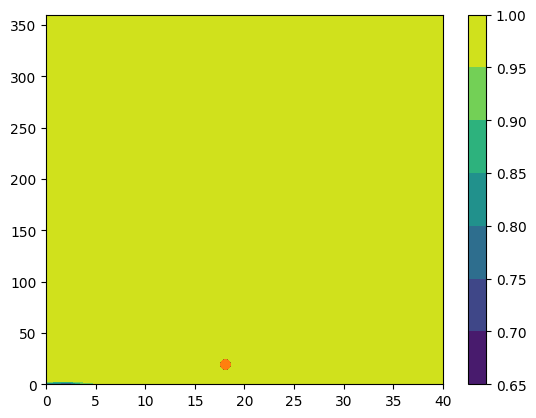

In [38]:
# Build the model
model = Sequential()

# Set up the layers
model.add(Dense(units=4, activation='tanh', input_shape=(4,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Input the data
model.fit(X_scaled, Yt, epochs=200, batch_size=32)

npt = 100
Xgrid, x1line, x2line = gen_sample_grid(npt, 40, 360)

Xgrid = np.column_stack((Xgrid,Xgrid))
print(X_scaled.shape)
print(Xgrid.shape)
# Predict the model onto Xgrid
predicted_grid = model.predict(Xgrid)
predicted_grid = np.reshape(predicted_grid[:, 0], [npt, npt])

plt.contourf(x1line, x2line, predicted_grid, cmap='viridis')
plt.colorbar()
plt.scatter(X[Yt == 1, 0], X[Yt == 1, 1])
plt.scatter(X[Yt == 0, 0], X[Yt == 0, 1])
plt.show()